In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


total  = pd.read_csv('tradedata.csv',index_col = False,parse_dates = ['Date'])
total.head()
total.tail()

,Date,abopen,abhigh,ablow,abclose,abadjclose,abvolume,spopen,sphigh,splow,spclose,spadjclose,spvolume,pratio
2380,2019-09-12,451.000000,452.500000,442.500000,447.950012,447.950012,56950,434.000000,434.500000,423.500000,427.000000,427.000000,279555.0,0.953231362
2381,2019-10-12,450.000000,450.399994,430.000000,432.549988,432.549988,60536,429.899994,435.750000,425.500000,427.500000,427.500000,395042.0,0.988325077
2382,2019-11-12,432.549988,453.149994,431.500000,449.299988,449.299988,126103,434.700012,434.700012,425.500000,429.399994,429.399994,204221.0,0.955708893
2383,2019-12-12,449.899994,451.450012,444.000000,448.600006,448.600006,79189,430.899994,437.950012,430.750000,433.799988,433.799988,203254.0,0.967008431
2384,2019-12-13,448.149994,452.600006,440.600006,449.200012,449.200012,89216,436.299988,441.899994,425.799988,438.649994,438.649994,328914.0,0.976513763


In [26]:
interval_start = 1066
interval_end =2266
data = total.iloc[interval_start : interval_end]
    

data.head()
data.tail()

,Date,abopen,abhigh,ablow,abclose,abadjclose,abvolume,spopen,sphigh,splow,spclose,spadjclose,spvolume,pratio
2261,2019-12-06,652.500000,653.900024,636.599976,641.650024,639.846436,89681,392.000000,397.000000,386.000000,391.649994,389.120575,449729.0,0.610379458
2262,2019-06-13,641.650024,642.750000,629.000000,636.650024,634.860474,59144,392.000000,393.600006,385.700012,390.100006,387.580597,193543.0,0.61273854
2263,2019-06-14,638.000000,638.000000,603.299988,616.299988,614.567627,360427,390.000000,394.899994,376.850006,392.350006,389.816040,596609.0,0.636621797
2264,2019-06-17,621.000000,628.500000,615.400024,623.049988,621.298645,88735,393.000000,394.000000,380.200012,382.649994,380.178680,293959.0,0.614156169
2265,2019-06-18,625.000000,627.900024,620.549988,622.150024,620.401245,49655,382.649994,385.700012,374.200012,378.399994,375.956146,269097.0,0.60821342


In [32]:
ratios = data['abadjclose'] / data['spadjclose']
print(len(ratios))

train = ratios[:800]
test = ratios[800:]
#train test split :75-25
#train = data.iloc[:1834]
#test= data.iloc[1834:]


1200


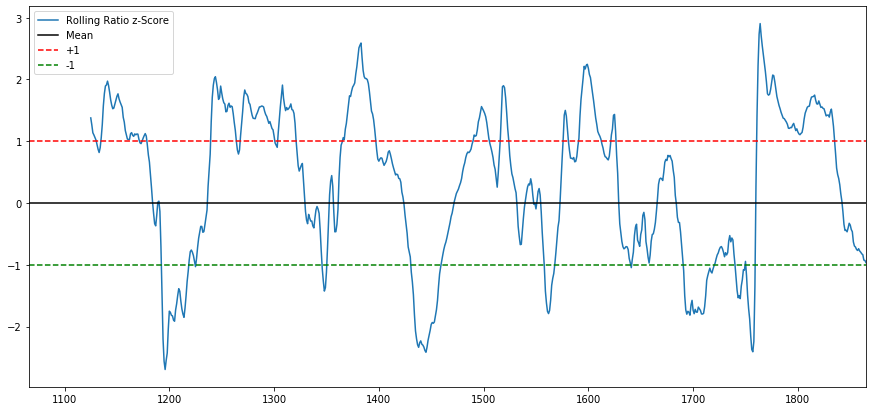

In [40]:
def plot_zscore(z_score,up_dev,low_dev):
        plt.figure(figsize=(15,7))
        z_score.plot()
        plt.axhline(0, color='black')
        plt.axhline(up_dev, color='red', linestyle='--')
        plt.axhline(low_dev, color='green', linestyle='--')
        plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
        plt.show()

plot_zscore(zscore_60_5,1,-1)

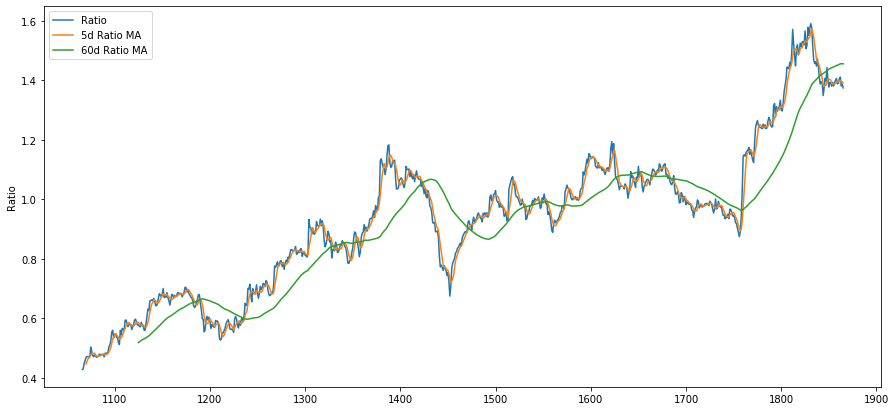

In [41]:
ratios_mavg5 = train.rolling(window=5,
                               center=False).mean()
ratios_mavg60 = train.rolling(window=60,
                               center=False).mean()
std_60 = train.rolling(window=60,
                        center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Ratio')
plt.show()

800


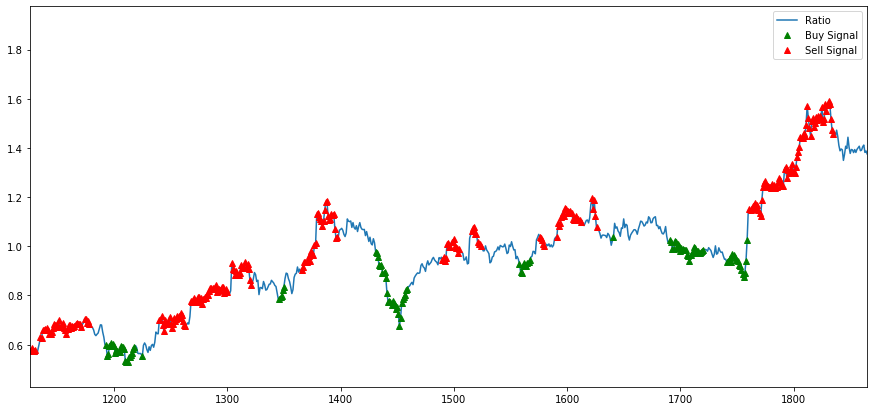

In [42]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))
print(len(train))
train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()


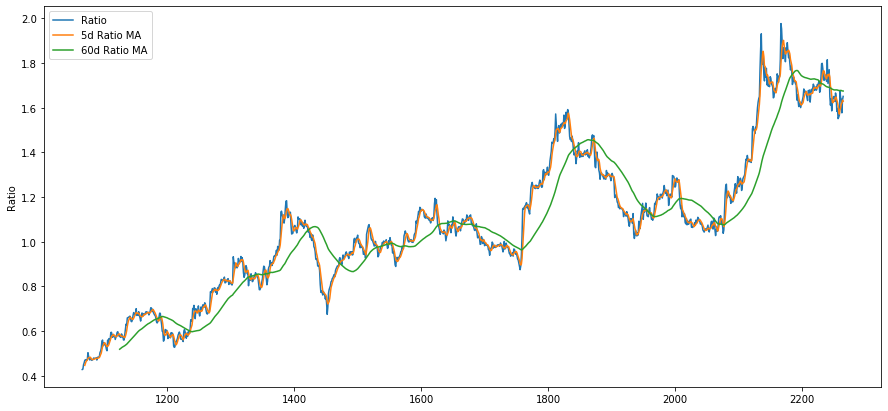

In [43]:
ratios_mavg5 = ratios.rolling(window=5,
                               center=False).mean()
ratios_mavg60 = ratios.rolling(window=60,
                               center=False).mean()
std_60 = ratios.rolling(window=60,
                        center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(ratios.index, ratios.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Ratio')
plt.show()

1200


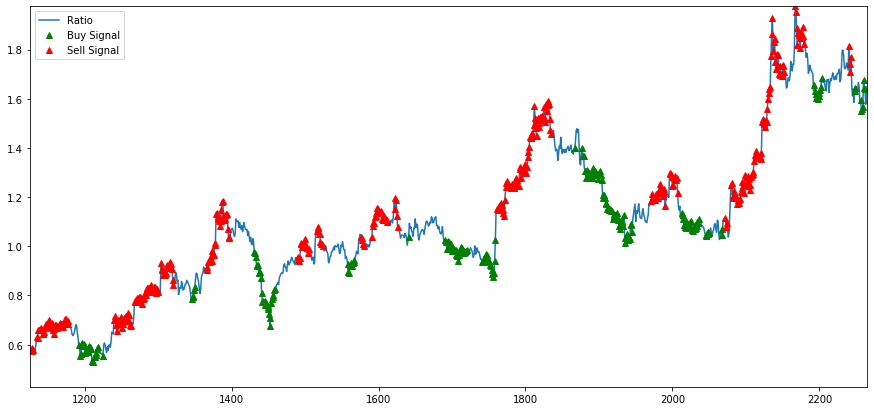

In [44]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))
print(len(ratios))
ratios[60:].plot()
buy = ratios.copy()
sell = ratios.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

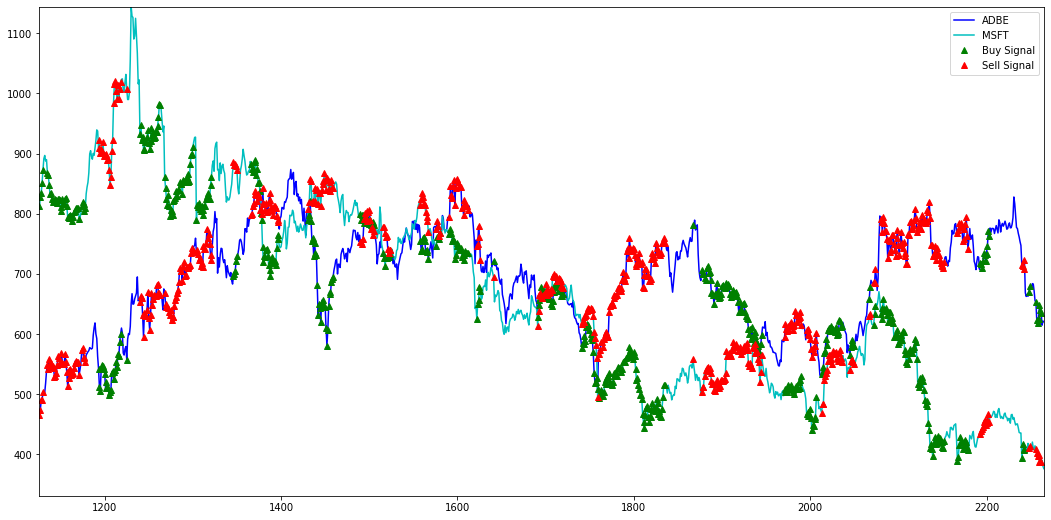

In [45]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 = data['abadjclose']
S2 = data['spadjclose']
S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()
# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['ADBE','MSFT', 'Buy Signal', 'Sell Signal'])
plt.show()